## References
 - __[Script: Kaggle](https://www.kaggle.com/code/varunsaikanuri/spotify-data-visualization/notebook)__
 - __[Dataset: Kaggle](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019?resource=download)__

## Import Libraries

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

## Data Inspection

In [5]:
# Load Data
df=pd.read_csv('../Python/Input/songs_normalize.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [6]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [7]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [8]:
# Check for null values
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [9]:
# Check the resulting shape of the dataset
print(df.shape, "\n")

# Check for duplicates
print(df.duplicated().value_counts(), "\n")

# Drop the duplicated values
df.drop_duplicates(inplace=True)

# Check the resulting shape of the dataset
print(df.shape, "\n")

(2000, 18) 

False    1941
True       59
Name: count, dtype: int64 

(1941, 18) 



# Exploratory Data Analysis

## Pairwise Correlation of Columns

In [21]:
df_corr = df.drop(axis=1, columns=['artist', 'song','genre'])
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1941 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       1941 non-null   int64  
 1   explicit          1941 non-null   bool   
 2   year              1941 non-null   int64  
 3   popularity        1941 non-null   int64  
 4   danceability      1941 non-null   float64
 5   energy            1941 non-null   float64
 6   key               1941 non-null   int64  
 7   loudness          1941 non-null   float64
 8   mode              1941 non-null   int64  
 9   speechiness       1941 non-null   float64
 10  acousticness      1941 non-null   float64
 11  instrumentalness  1941 non-null   float64
 12  liveness          1941 non-null   float64
 13  valence           1941 non-null   float64
 14  tempo             1941 non-null   float64
dtypes: bool(1), float64(9), int64(5)
memory usage: 229.4 KB


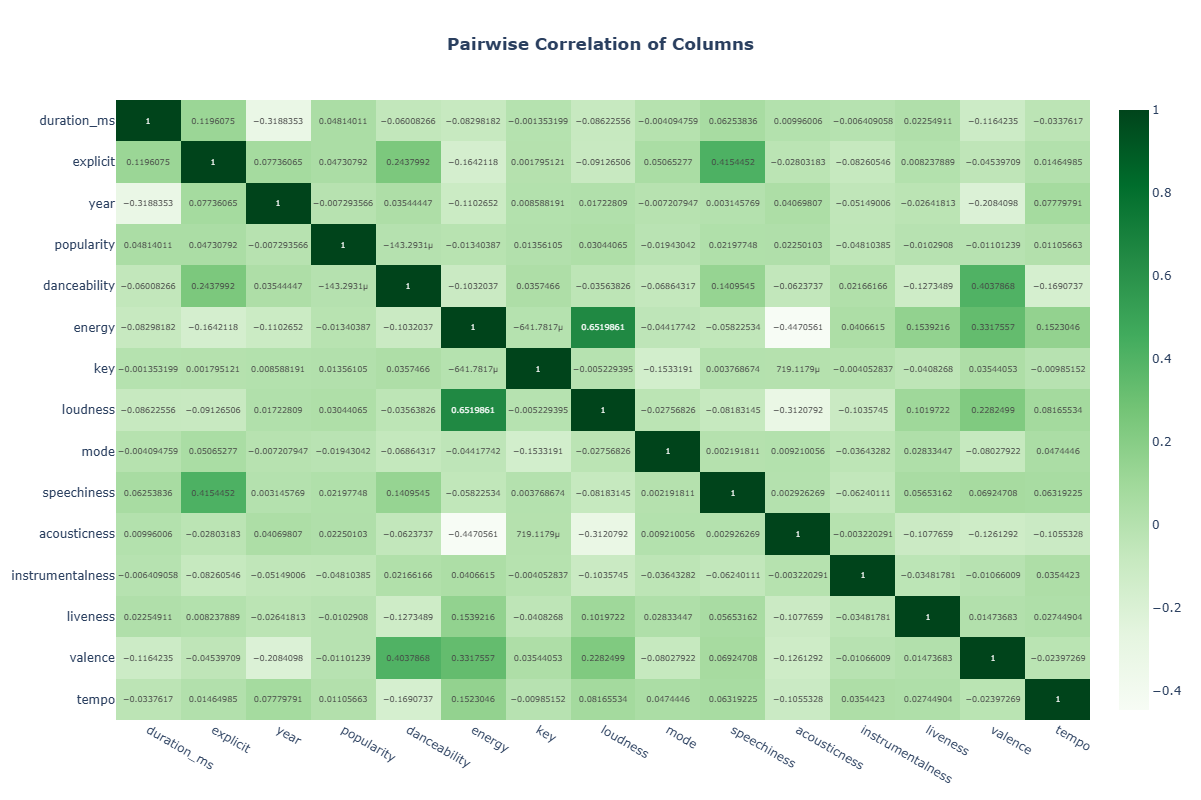

In [35]:
fig=px.imshow(df_corr.corr(), text_auto=True, height=800, width=800, color_continuous_scale=px.colors.sequential.Greens, 
              aspect='auto', title='<b>Pairwise Correlation of Columns')
fig.update_layout(title_x=0.5)
fig.show()

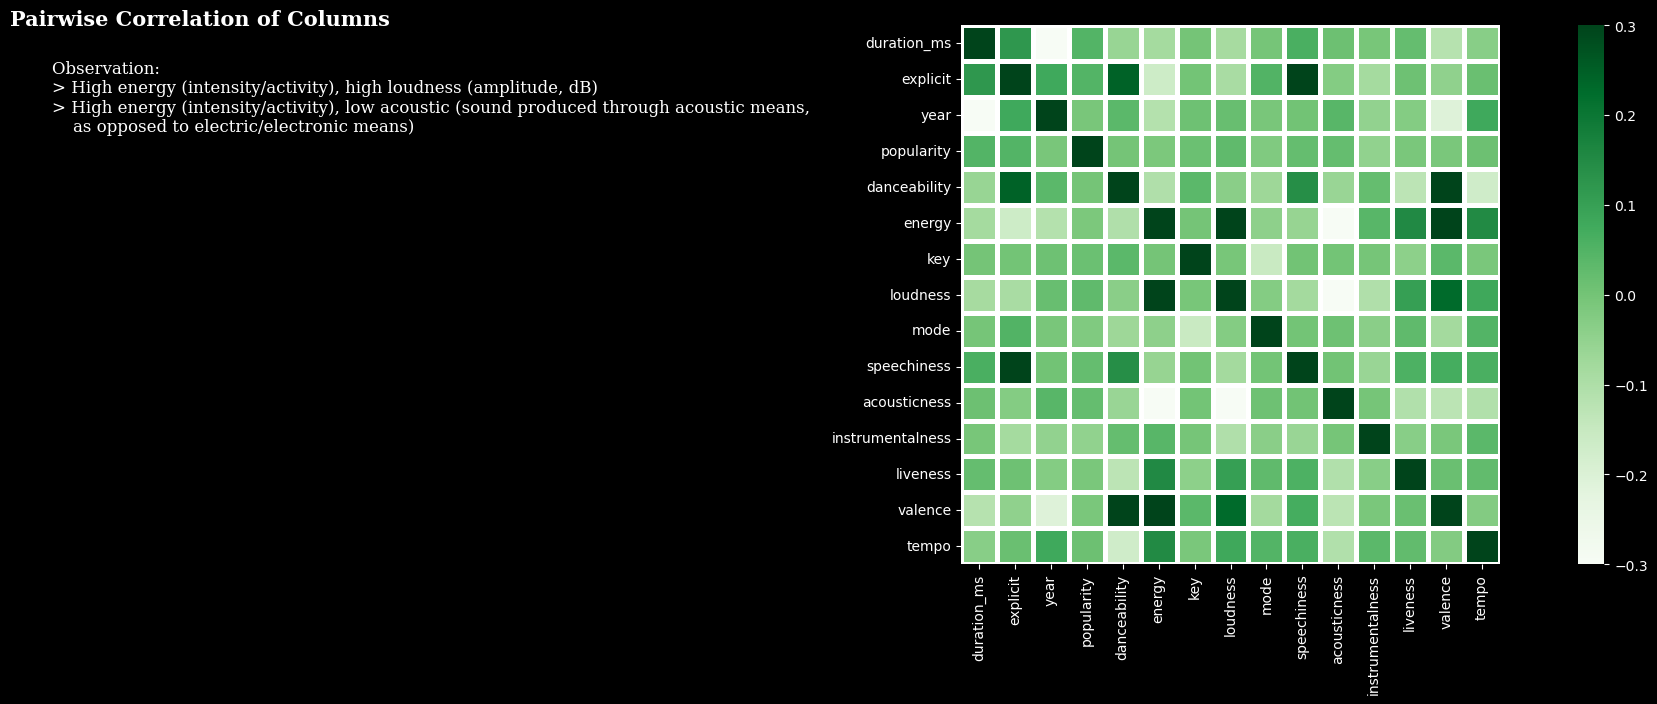

In [239]:
# Correlation
corr = df_corr.corr()

# olour map 
cmap = matplotlib.colormaps['Greens']

# style
# plt.style.use('default')
plt.style.use('dark_background')

# Plot
fig, ax = plt.subplots(figsize=(20, 7))
fig.text(0,.88,'Pairwise Correlation of Columns', fontfamily='serif',fontweight='bold',fontsize=15)
fig.text(0,0.7,
        '''
        Observation:
        > High energy (intensity/activity), high loudness (amplitude, dB)
        > High energy (intensity/activity), low acoustic (sound produced through acoustic means, 
            as opposed to electric/electronic means)
        ''', fontfamily='serif',fontsize=12,ha='left')

sns.heatmap(
    corr,
    cmap=cmap,
    vmax=0.3,        # Set max value for normalization
    vmin=-0.3,       # Set min value for normalization
    center=0,        # Center around 0 for balanced coloring
    square=True,     # Keep the heatmap square-shaped
    linewidths=2.5   # Add space between cells for clarity
)

plt.show()

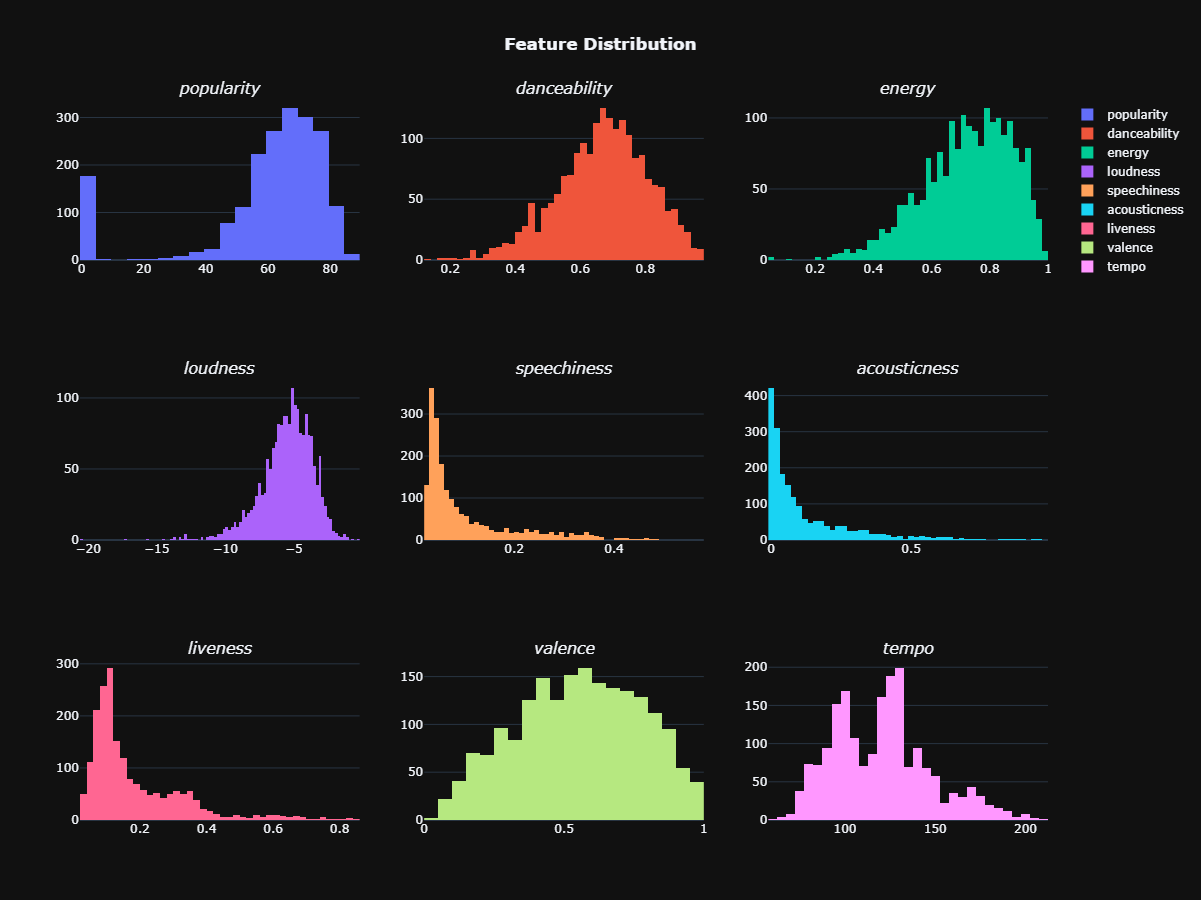

In [157]:
fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>popularity', '<i>danceability', '<i>energy', 
                                                '<i>loudness', '<i>speechiness', '<i>acousticness', 
                                                '<i>liveness', '<i>valence', '<i>tempo'))
fig.add_trace(go.Histogram(x=df['popularity'],name='popularity'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['danceability'],name='danceability'),row=1,col=2)
fig.add_trace(go.Histogram(x=df['energy'],name='energy'),row=1,col=3)
fig.add_trace(go.Histogram(x=df['loudness'],name='loudness'),row=2,col=1)
fig.add_trace(go.Histogram(x=df['speechiness'],name='speechiness'),row=2,col=2)
fig.add_trace(go.Histogram(x=df['acousticness'],name='acousticness'),row=2,col=3)
fig.add_trace(go.Histogram(x=df['liveness'],name='liveness'),row=3,col=1)
fig.add_trace(go.Histogram(x=df['valence'],name='valence'),row=3,col=2)
fig.add_trace(go.Histogram(x=df['tempo'],name='tempo'),row=3,col=3)
fig.update_layout(height=900,width=900,title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_dark',title_x=0.5)

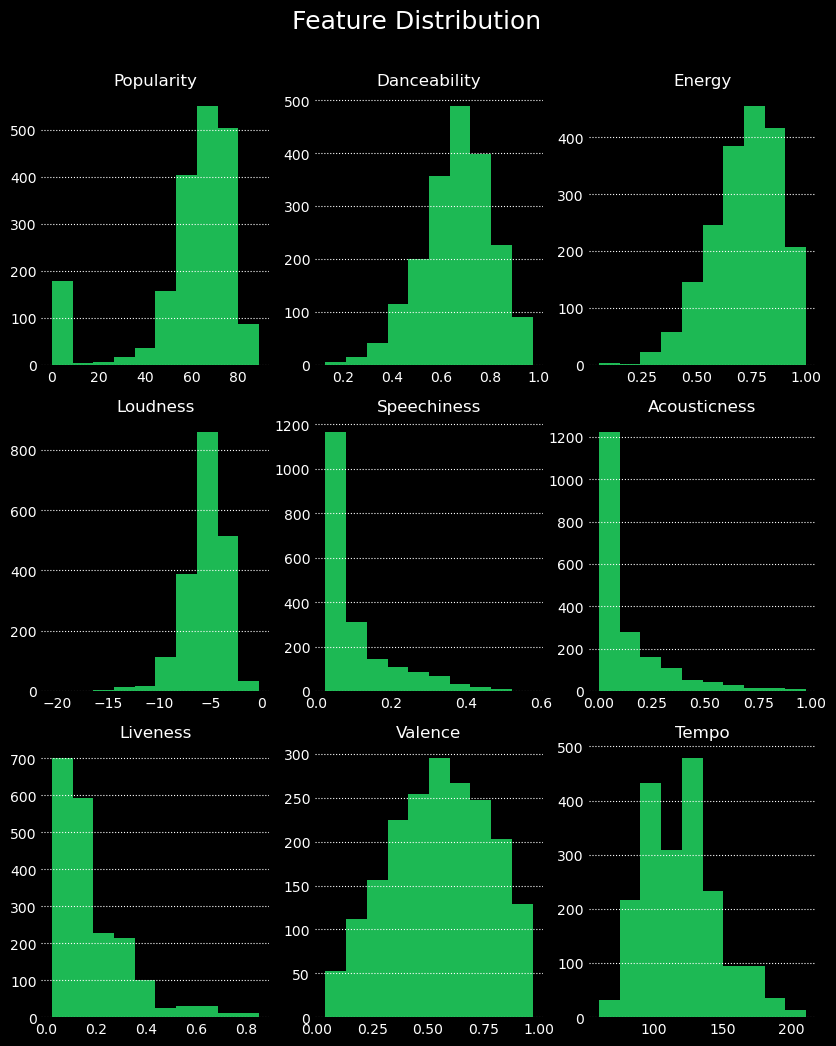

In [241]:
# Objective: Simplify the code by using list comprehension & for loop
# Interested Columns
cols = ['popularity', 'danceability', 'energy', 
      'loudness', 'speechiness', 'acousticness', 
      'liveness', 'valence', 'tempo']
subplot_titles = ['<i>'+col for col in cols]

# Plots
plt.figure(figsize=(10, 12))
plt.suptitle("Feature Distribution", fontsize=18, y=0.95)

for n, col in enumerate(cols):
    ax = plt.subplot(3, 3, n + 1)
    ax.hist(x=df[col], label=col, color='#1db954')
    ax.set_title(col.capitalize())
    for s in ['top', 'right','bottom','left']:
        ax.spines[s].set_visible(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.grid(True, axis='y', ls=':')

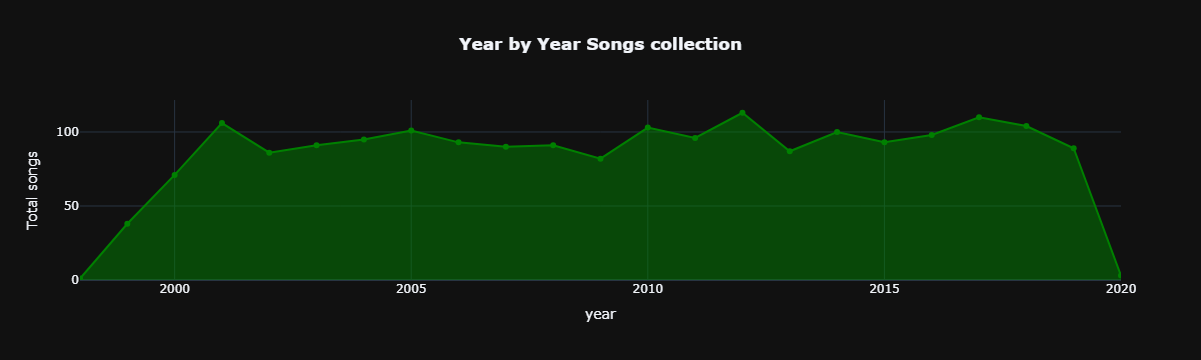

In [415]:
df_tmp = df.groupby('year',as_index=False).count().sort_values(by='song',ascending=False).sort_values(by='year')

fig=px.area(df_tmp, x='year', y='song', markers=True, 
            labels={'song':'Total songs'}, color_discrete_sequence=['green'], template='plotly_dark',
            title='<b>Year by Year Songs collection')
fig.update_layout(hovermode='x',title_x=0.5)

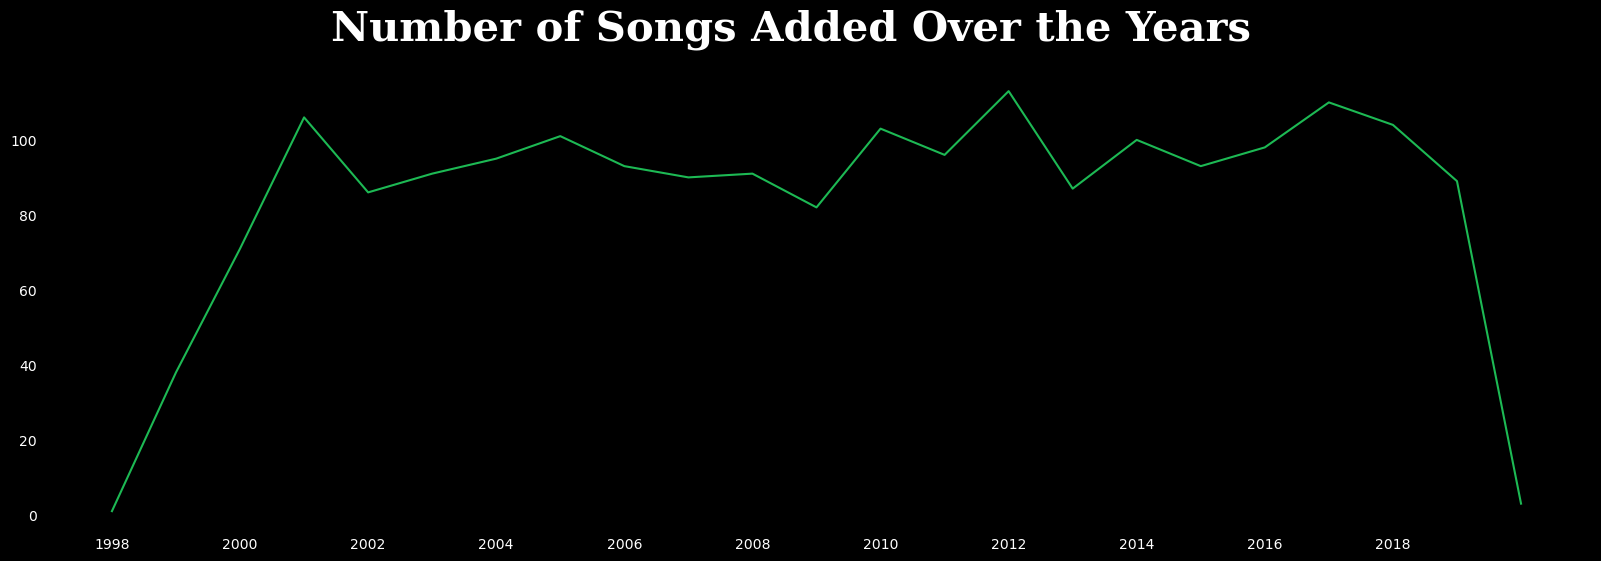

In [1065]:
# Data
data = df[['year','song']].groupby('year').count()

# Plots
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

ax.plot(data.index,data.song, color='#1db954')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)
ax.grid(False)
plt.xticks(np.arange(1998, 2020, 2))
ax.tick_params(axis=u'both', which=u'both',length=0)
# ax.set_ylabel('Total Songs')

fig.text(0.27, 0.93, 'Number of Songs Added Over the Years', fontsize=30, fontweight='bold', fontfamily='serif')

plt.show()

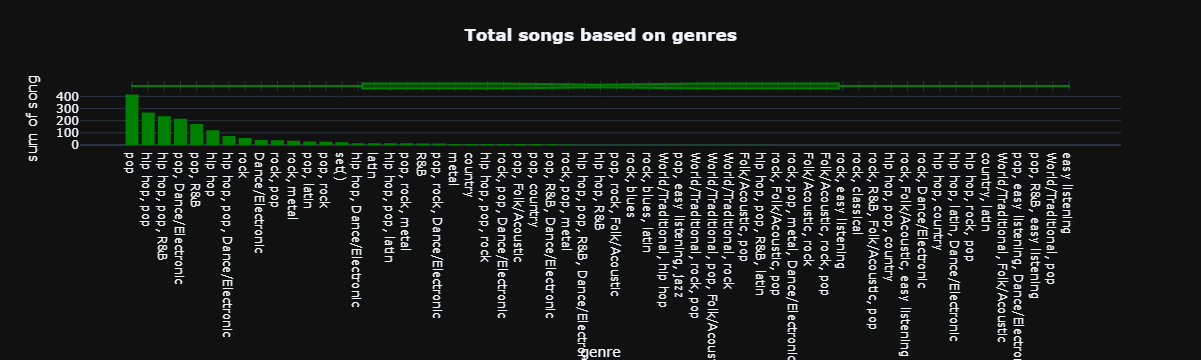

In [297]:
data = df.groupby('genre',as_index=False).count().sort_values(by='song',ascending=False)
fig=px.histogram(data, x='genre', y='song', color_discrete_sequence=['green'], 
                 template='plotly_dark', marginal='box', title='<b>Total Songs Based on Genres</b>')
fig.update_layout(title_x=0.5)

In [1035]:
# Obj: Use feature engineering to grab the first genre
# Helper column for various plots
df['count'] = 1

# first genre
df.groupby('genre').count()
df['first_genre'] = df['genre'].apply(lambda x: x.split(",")[0]).apply(lambda x: x.capitalize()).apply(lambda x: x.split("/")[0])
# df.info()

# Rename
df['first_genre'].replace('Hip hop', 'Hip Hop', inplace=True)
df['first_genre'].replace('Set()', 'Undefined', inplace=True)
df['first_genre'].replace('Easy listening', 'Easy Listening', inplace=True)

data = df.groupby(['first_genre'])['count'].sum().sort_values(ascending=False)
data.head(20)

first_genre
Pop               912
Hip Hop           749
Rock              155
Dance              41
Undefined          22
Latin              15
R&b                13
Country            10
World              10
Metal               9
Folk                4
Easy Listening      1
Name: count, dtype: int64

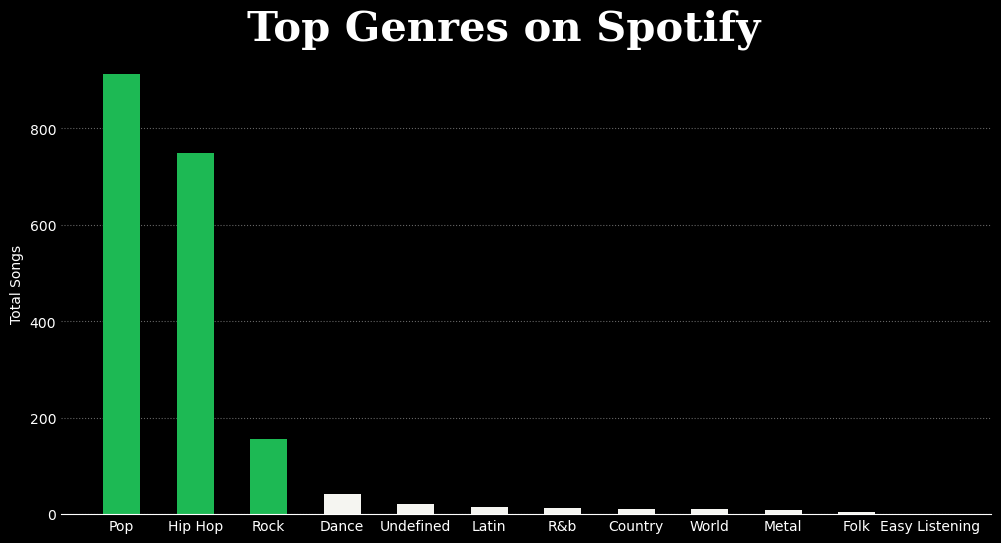

In [1045]:
# Colors
color_map = ['#f5f5f1' for _ in range(len(data.index))]
color_map[0] = color_map[1] = color_map[2] =  '#1db954' # color highlight

# Plot
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       linewidth=0.6,color=color_map)
ax.tick_params(axis=u'both', which=u'both',length=0)

# Remove border from plot
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Grid
ax.grid(axis='y', linestyle=':', alpha=0.4)   
grid_y_ticks = np.arange(0, 1000, 200) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

ax.set_ylabel('Total Songs')

fig.text(0.28, 0.9, 'Top Genres on Spotify', fontsize=30, fontweight='bold', fontfamily='serif')

plt.show()

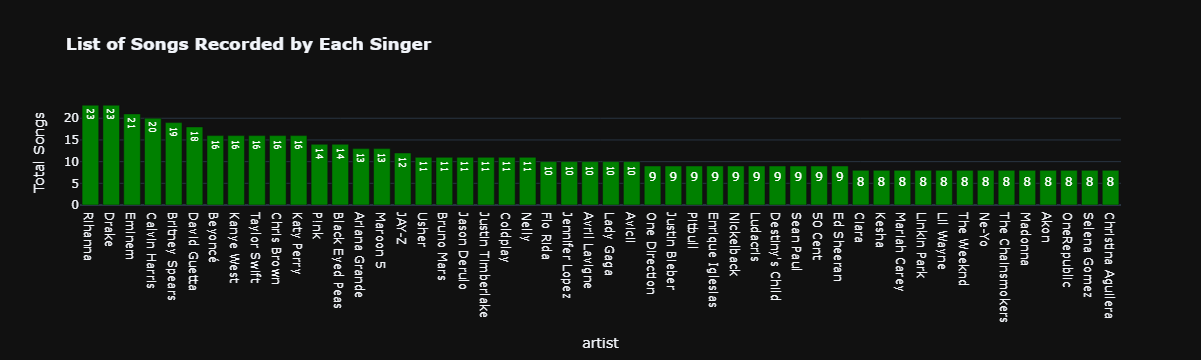

In [413]:
px.bar(df.groupby('artist',as_index=False).count().sort_values(by='song',ascending=False).head(50),
       x='artist',y='song',labels={'song':'Total Songs'},width=1000, template='plotly_dark',
       color_discrete_sequence=['green'],text='song',title='<b> List of Songs Recorded by Each Singer')

In [1023]:
data = df[['artist','count']].groupby('artist').sum().sort_values(by='count',ascending=False).head(10).reset_index()
data.head(20)

,artist,count
0,Rihanna,23
1,Drake,23
2,Eminem,21
3,Calvin Harris,20
4,Britney Spears,19
5,David Guetta,18
6,Beyoncé,16
7,Kanye West,16
8,Taylor Swift,16
9,Chris Brown,16


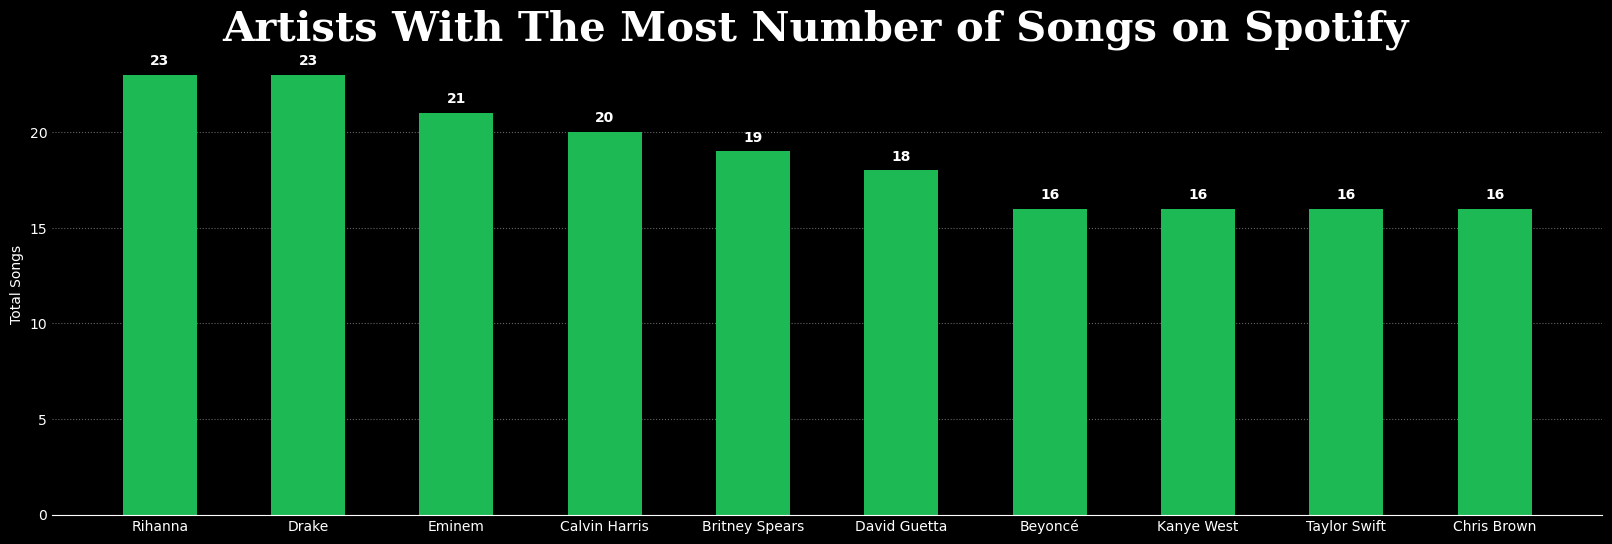

In [1033]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(20, 6))
rects=ax.bar(data['artist'], data['count'], width=0.5, 
       linewidth=0.6,color='#1db954')
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.bar_label(rects,labels=data['count'].apply(str),
              padding=5, color='white', fontweight='bold')

# Remove border from plot
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Grid
ax.grid(axis='y', linestyle=':', alpha=0.4)   
grid_y_ticks = np.arange(0, 25, 5) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

ax.set_ylabel('Total Songs')

fig.text(0.21, 0.9, 'Artists With The Most Number of Songs on Spotify', fontsize=30, fontweight='bold', fontfamily='serif')

plt.show()

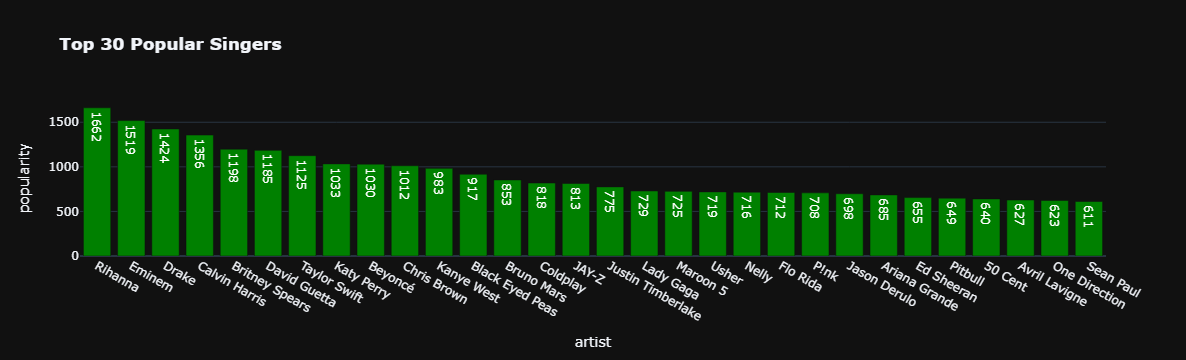

In [655]:
px.bar(df.groupby('artist',as_index=False).sum().sort_values(by='popularity',ascending=False).head(30),
       x='artist',y='popularity',color_discrete_sequence=['green'],
       template='plotly_dark',text='popularity',title='<b>Top 30 Popular Singers')

In [1015]:
data = df[['artist','popularity']].groupby('artist').sum().sort_values(by='popularity',ascending=False).head(10).reset_index()
data.head(20)

,artist,popularity
0,Rihanna,1662
1,Eminem,1519
2,Drake,1424
3,Calvin Harris,1356
4,Britney Spears,1198
5,David Guetta,1185
6,Taylor Swift,1125
7,Katy Perry,1033
8,Beyoncé,1030
9,Chris Brown,1012


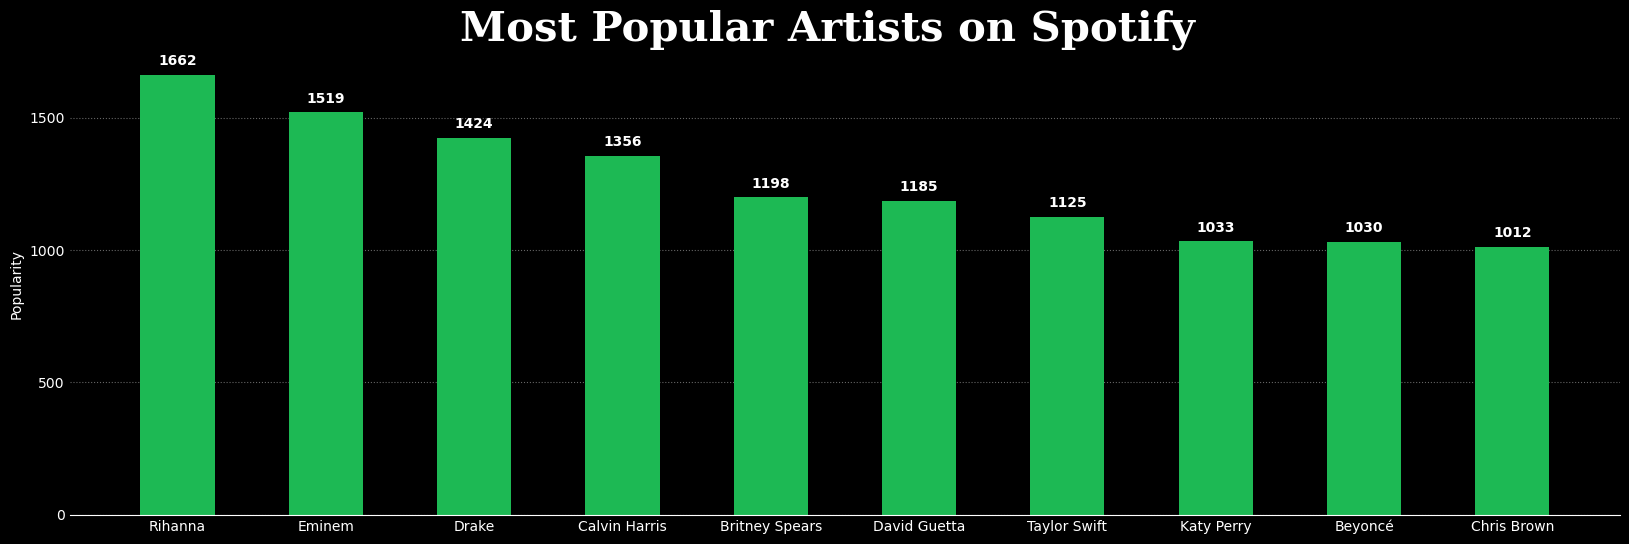

In [1021]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(20, 6))
rects=ax.bar(data['artist'], data['popularity'], width=0.5, 
       linewidth=0.6,color='#1db954')
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.bar_label(rects,labels=data['popularity'].apply(str),
              padding=5, color='white', fontweight='bold')

# Remove border from plot
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Grid
ax.grid(axis='y', linestyle=':', alpha=0.4)   
grid_y_ticks = np.arange(0, 2000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

ax.set_ylabel('Popularity')

fig.text(0.32, 0.9, 'Most Popular Artists on Spotify', fontsize=30, fontweight='bold', fontfamily='serif')

plt.show()

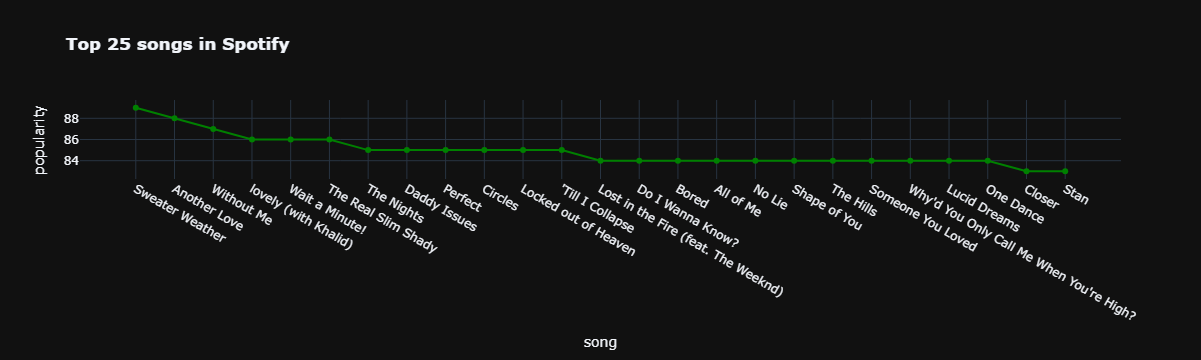

In [653]:
data = df.sort_values(by='popularity',ascending=False).head(25)

fig=px.line(data,
            x='song',y='popularity',hover_data=['artist'],color_discrete_sequence=['green'],
            template='plotly_dark',markers=True,title='<b> Top 25 songs in Spotify')
fig.show()

In [1003]:
data = df[['artist','song','popularity']].sort_values(by='popularity',ascending=False).head(10)
data.head(20)

,artist,song,popularity
1322,The Neighbourhood,Sweater Weather,89
1311,Tom Odell,Another Love,88
201,Eminem,Without Me,87
1819,Billie Eilish,lovely (with Khalid),86
1613,WILLOW,Wait a Minute!,86
6,Eminem,The Real Slim Shady,86
1514,Avicii,The Nights,85
1512,The Neighbourhood,Daddy Issues,85
1709,Ed Sheeran,Perfect,85
1999,Post Malone,Circles,85


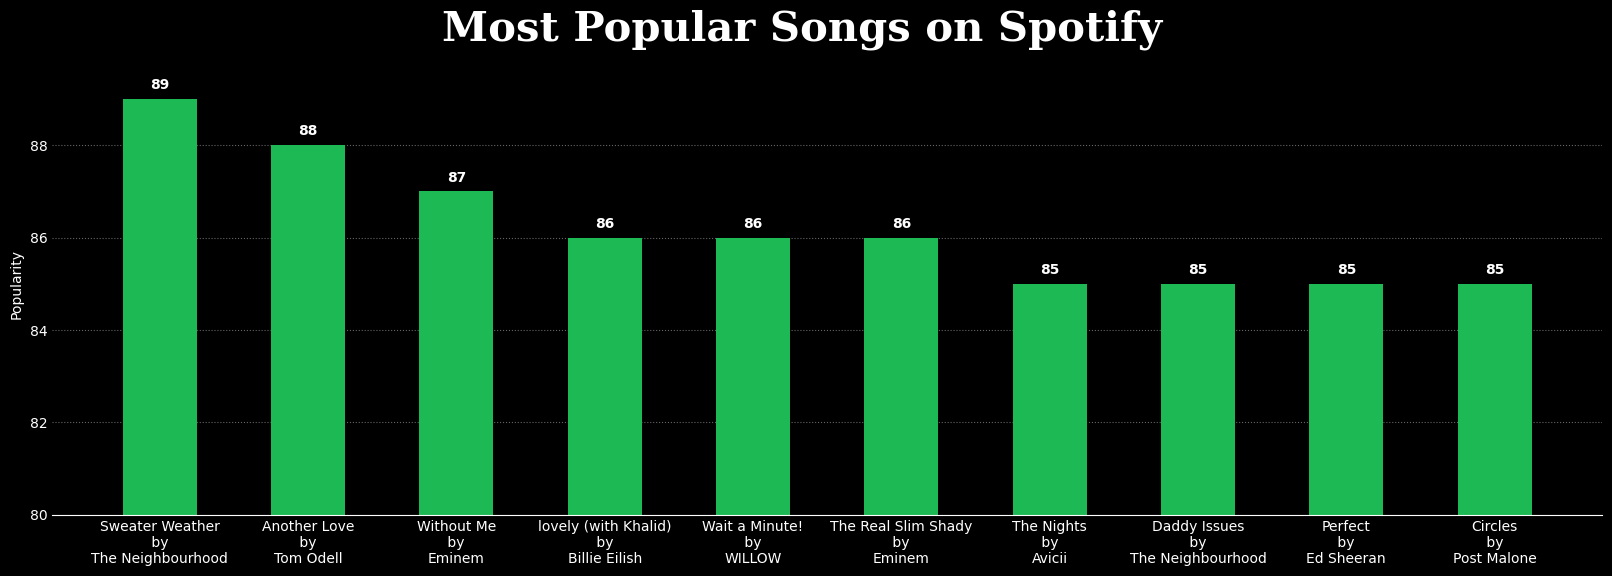

In [1013]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(20, 6))
xlabel = data['song'].apply(str) + "\n by \n" + data['artist'].apply(str)

rects=ax.bar(xlabel, data['popularity'], width=0.5, 
       linewidth=0.6,color='#1db954')
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.bar_label(rects,labels=data['popularity'].apply(str),
              padding=5, color='white', fontweight='bold')

# Remove border from plot
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Grid
ax.grid(axis='y', linestyle=':', alpha=0.4)   
grid_y_ticks = np.arange(80, 90, 2) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)
# ax.set_xticklabels(xlabel)

ax.set_ylabel('Popularity')
# plt.xticks(rotation=45)
ax.set_ylim((80,90))

fig.text(0.32, 0.9, 'Most Popular Songs on Spotify', fontsize=30, fontweight='bold', fontfamily='serif')

plt.show()

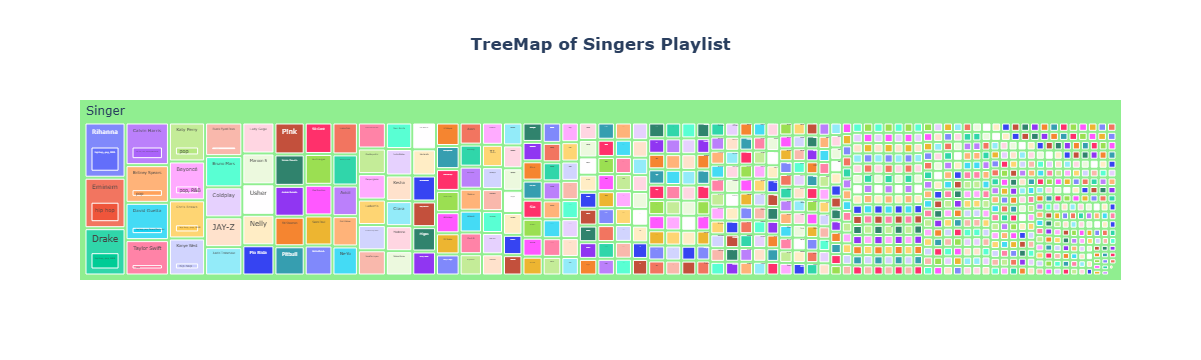

In [671]:
# Create the treemap visualization
fig = px.treemap(
    df, 
    path=[px.Constant('Singer'), 'artist', 'genre'], 
    values='popularity', 
    title='<b>TreeMap of Singers Playlist'
)
fig.update_traces(root_color='lightgreen')  # Set the root node color
fig.update_layout(title_x=0.5)  # Center the title

# Display the plot
fig.show()

In [749]:
data = df[['artist', 'first_genre','popularity','energy']].groupby('artist').sum().sort_values(by='popularity',ascending=False).head(10).reset_index()

genres = []
for i in range(len(data['first_genre'])):
    if 'Hip' in data['first_genre'][i]:
        genres.append('Hip Hop')
    else:
        genres.append('Pop')
# print(genres)

data['genre'] = genres

data.drop(labels='first_genre',axis=1,inplace=True)
data.head(20)

,artist,popularity,energy,genre
0,Rihanna,1662,15.292,Hip Hop
1,Eminem,1519,16.374,Hip Hop
2,Drake,1424,13.767,Hip Hop
3,Calvin Harris,1356,17.429,Hip Hop
4,Britney Spears,1198,14.198,Pop
5,David Guetta,1185,14.444,Hip Hop
6,Taylor Swift,1125,11.222,Pop
7,Katy Perry,1033,12.462,Pop
8,Beyoncé,1030,10.480,Pop
9,Chris Brown,1012,10.888,Hip Hop


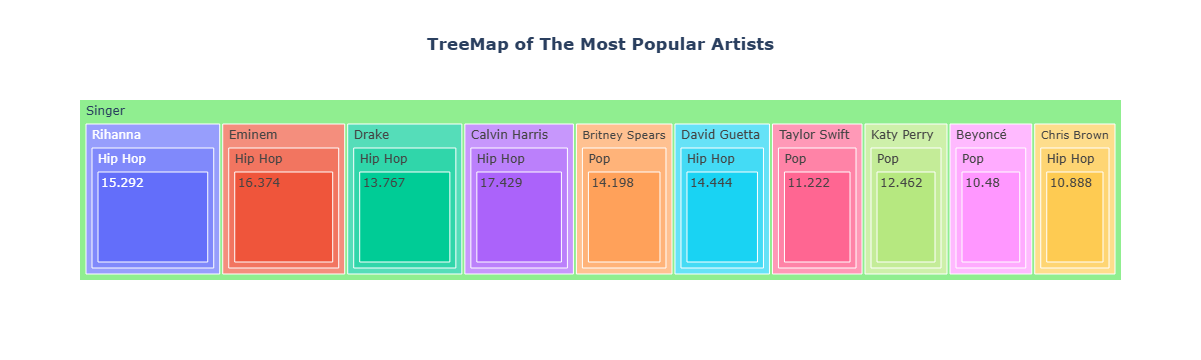

In [755]:
# Create the treemap visualization
fig = px.treemap(
    data, 
    path=[px.Constant('Singer'), 'artist', 'genre', 'energy'], 
    values='popularity', 
    title='<b>TreeMap of The Most Popular Artists'
)
fig.update_traces(root_color='lightgreen')  # Set the root node color
fig.update_layout(title_x=0.5)  # Center the title

# Display the plot
fig.show()

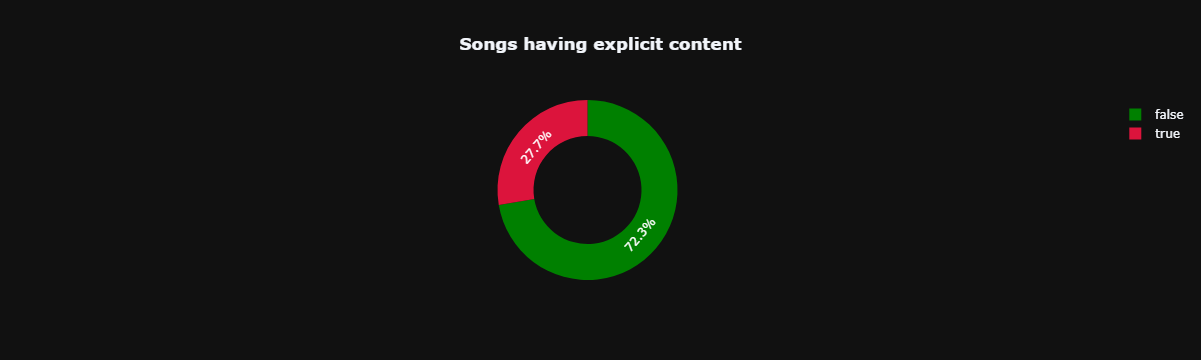

In [757]:
fig=px.pie(df.groupby('explicit',as_index=False).count().sort_values(by='song',ascending=False),
           names='explicit',values='song',labels={'song':'Total songs'},hole=.6,
           color_discrete_sequence=['green','crimson'],template='plotly_dark',title='<b>Songs having explicit content')
fig.update_layout(title_x=0.5)

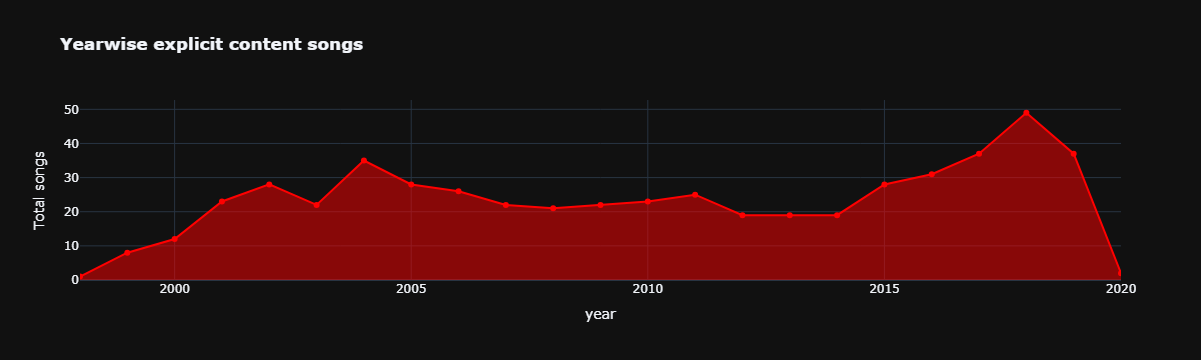

In [843]:
fig=px.area(df[df['explicit']==True].groupby('year',as_index=False).count().sort_values(by='song',ascending=False).sort_values(by='year'),
            x='year',y='song',labels={'song':'Total songs'},markers=True,
            color_discrete_sequence=['red'],template='plotly_dark',title='<b>Yearwise explicit content songs')
fig.update_layout(hovermode='x')

In [1109]:
data = df[['explicit','count']].groupby('explicit').count().sort_values(by='count',ascending=True).reset_index()
data.head()

,explicit,count
0,True,537
1,False,1404


In [1111]:
data2 = df[['year','explicit']][df['explicit']==True].groupby('year').count().sort_values(by='explicit',ascending=False).reset_index()
data2 = df[['year','explicit']][df['explicit']==True].groupby('year').count().reset_index()
data2.head(10)

,year,explicit
0,1998,1
1,1999,8
2,2000,12
3,2001,23
4,2002,28
5,2003,22
6,2004,35
7,2005,28
8,2006,26
9,2007,22


In [1113]:
data3 = df[['artist','explicit']][df['explicit']==True].groupby('artist').count().sort_values(by='explicit',ascending=False).reset_index().head(10)
data3.head(10)

,artist,explicit
0,Eminem,20
1,Drake,18
2,Kanye West,14
3,JAY-Z,12
4,50 Cent,9
5,Ludacris,9
6,Rihanna,8
7,Nelly,8
8,Missy Elliott,7
9,Lil Wayne,7


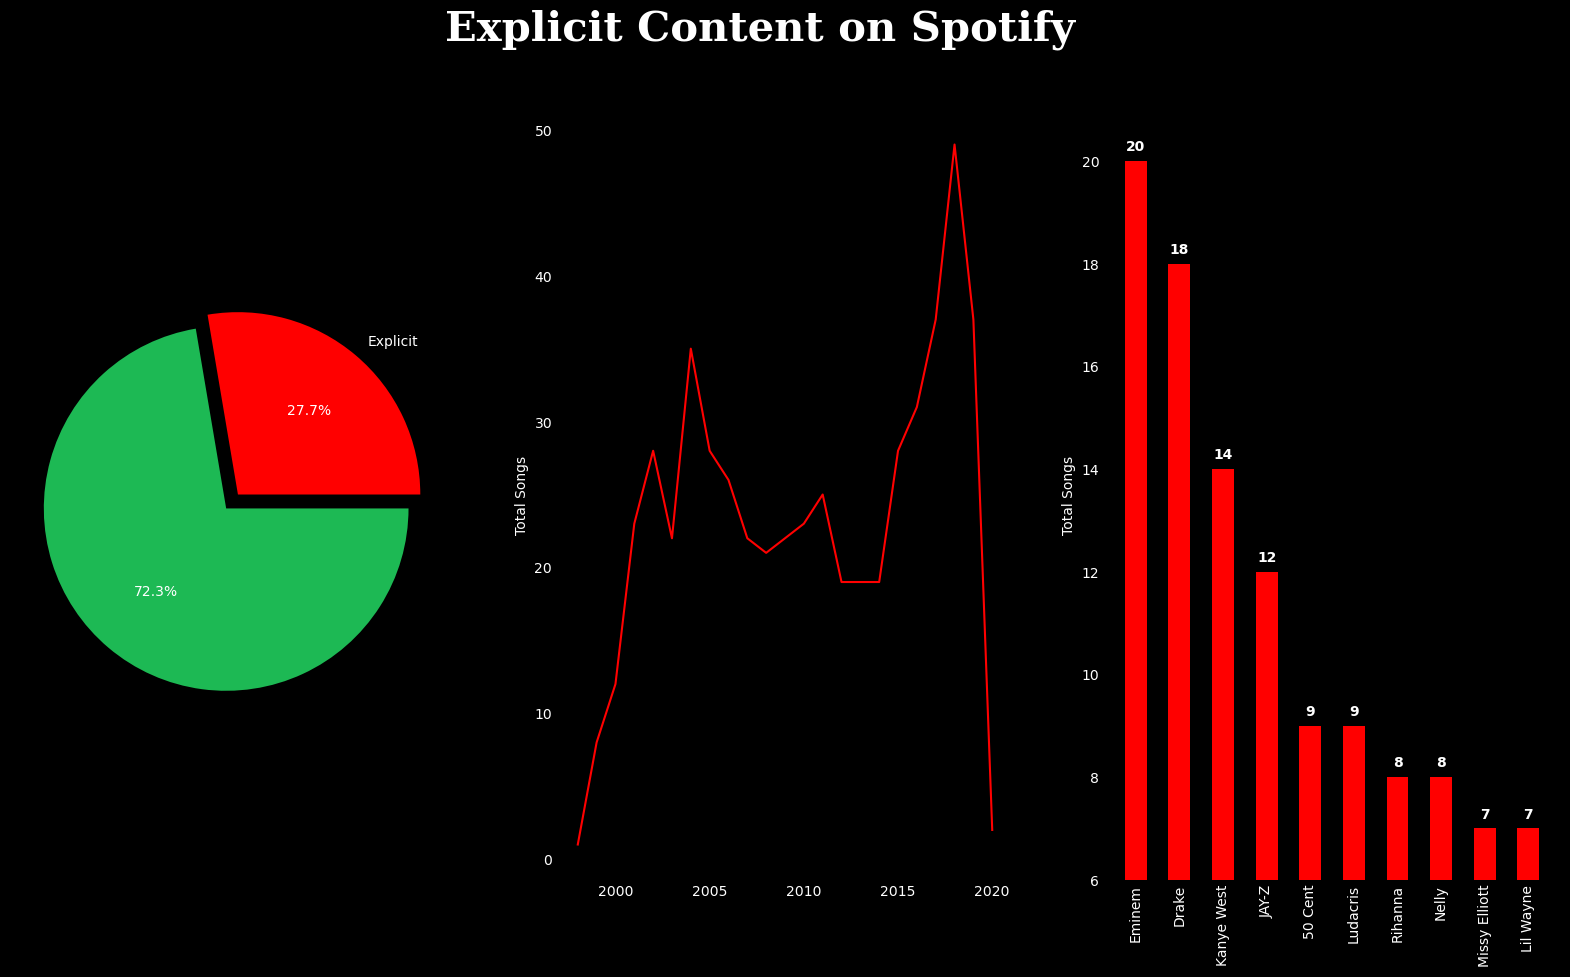

In [1115]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(1,3,1)
explode = (0, 0.1)
ax.pie(data['count'], labels=['Explicit', ''], autopct='%1.1f%%',
       colors=['red','#1db954'], explode=explode)

ax = fig.add_subplot(1,3,2)
ax.plot(data2['year'], data2['explicit'], color='red')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylabel('Total Songs')

ax = fig.add_subplot(1,3,3)
rects=ax.bar(data3['artist'], data3['explicit'], width=0.5, 
       linewidth=0.6,color='red')
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.bar_label(rects,labels=data3['explicit'].apply(str),
              padding=5, color='white', fontweight='bold')
for s in ['top', 'left', 'right','bottom']:
    ax.spines[s].set_visible(False)
ax.set_ylim((6,21))
ax.set_ylabel('Total Songs')
plt.xticks(rotation=90)

plt.suptitle('Explicit Content on Spotify', fontsize=30, fontweight='bold', fontfamily='serif')

plt.show()

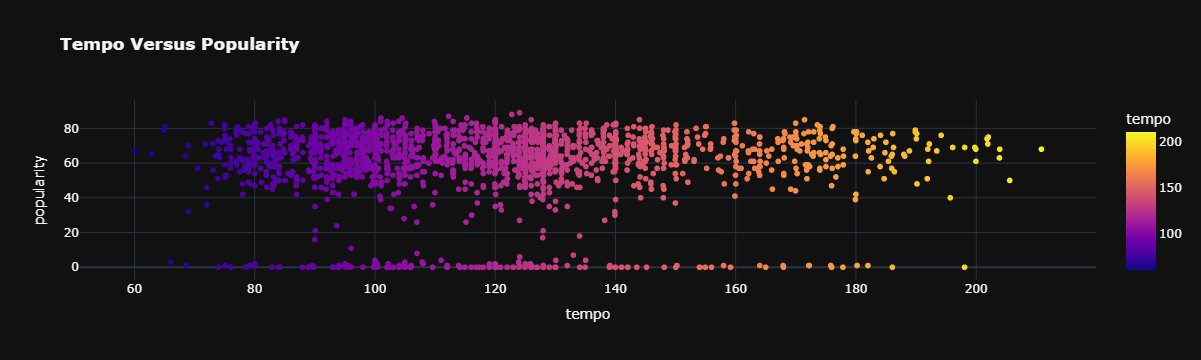

In [1095]:
px.scatter(df,x='tempo',y='popularity',color='tempo',color_continuous_scale=px.colors.sequential.Plasma,template='plotly_dark',title='<b>Tempo Versus Popularity')

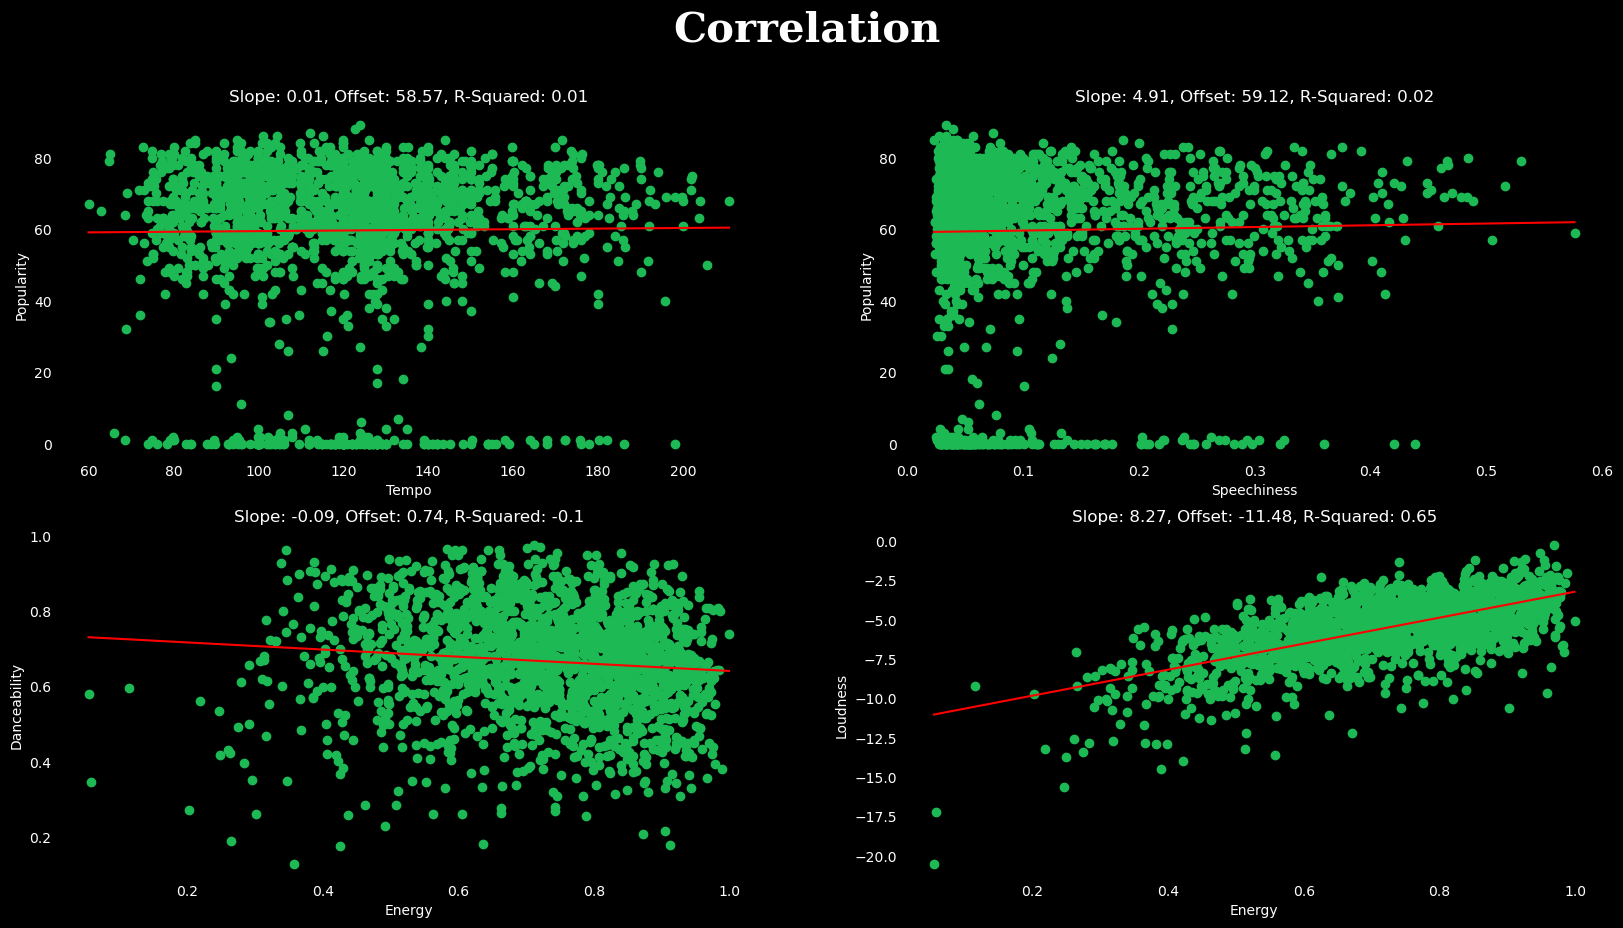

In [1199]:
# Columns
x = ['tempo','speechiness','energy','energy']
y = ['popularity','popularity','danceability','loudness']

# Plots
fig = plt.figure(figsize=(20,10))

for i in range(len(x)):
    ax = fig.add_subplot(2,2,i+1)
    ax.scatter(df[x[i]],df[y[i]], color='#1db954')
    ax.plot(np.unique(df[x[i]]), 
            np.poly1d(np.polyfit(df[x[i]], df[y[i]], 1))
            (np.unique(df[x[i]])), color='red')    
    for s in ['top', 'left', 'right','bottom']:
        ax.spines[s].set_visible(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_ylabel(y[i].capitalize())
    ax.set_xlabel(x[i].capitalize())
    arr = np.polyfit(df[x[i]], df[y[i]], 1)
    plt.title(f"Slope: {round(arr[0],2)}, Offset: {round(arr[1],2)}, R-Squared: {round(df[y[i]].corr(df[x[i]]),2)}")

plt.suptitle('Correlation', fontsize=30, fontweight='bold', fontfamily='serif')

plt.show()

# Conclusion
Top 3 Genres: 
1. Pop
2. Hip Hop
3. Rock

Most Popular Artists
| Artists  | Number of Songs | Explicit Content |
| -------- | ------- | ------ |
| Rihanna  | 23    | 8 |
| Drake    | 23     | 18 |
| Eminem   | 21    | 20 |

